# $X_{hh}$ vs $E_{hh}$

**Motivation:** We have these *2* trainings for Xhh vs Ehh, and we want to *validate* the performance in the categories for these 2 options rn.

My first idea as a diagnostics tool was to compare the post-fit / pulls plots in 3b1f, I *don't* think that

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pyhf

import operator as SmoothOperator 
from crypto_utils import *

import os
os.sys.path += ['../non-resonant-studies', "../stats-results/","../../hh4b/hh4b-plots/"]

from quad45_2x2 import res_bin_edges

from hh4b_plots.hh4b_plots import hh4b_plots, get_tree_label
from hh4b_plots.phys_utils import get_category_presets

%load_ext autoreload
%autoreload 2

Using uproot4


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


Using uproot4


In [7]:
nCats = 4
scale=1

In [8]:
width = nCats*5.95*scale
height =  6.31*scale
bottom = 0.25
left = 0.05


In [148]:
with open('../stats-results/Q45/ws-3b1f-systs-m_h1cut-124.0-m_h2cut-117.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_2_Xhh_2_deta_hh__b_only_postfit.json') as f:
    f_xhh = json.load(f)

In [149]:
with open('../stats-results/Q45/ws-3b1f-systs-m_h1cut-124.0-m_h2cut-117.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_2_Xhh_2_deta_hh_Ehh_nom_SR_b_only_postfit.json') as f:
    f_ehh_nomSR = json.load(f)

In [150]:
hists_xhh = f_xhh['hists']

In [151]:
f_xhh.keys()

dict_keys(['hists', 'bcat', 'cat_labels', 'bins', 'mu', 'nll', 'pre_nll'])

In [146]:
f_ehh_nomSR.keys()

dict_keys(['hists', 'bcat', 'cat_labels', 'bins', 'mu', 'nll', 'pre_nll'])

In [18]:
xhh_16 = hists_xhh['16']

In [161]:
e = np.array(f_xhh['bins'])

In [162]:
e

array([280., 302., 327., 353., 381., 411., 444., 480., 518., 560., 604.,
       653., 705., 761., 822., 888., 959.])

In [139]:
post

array([2.49274874e+00, 1.21970790e+01, 3.49015170e+01, 6.65535606e+01,
       9.60901599e+01, 1.22302741e+02, 1.29233353e+02, 1.25261672e+02,
       1.08087317e+02, 8.60067991e+01, 6.90609720e+01, 5.07195117e+01,
       3.80207018e+01, 2.72620555e+01, 1.98605373e+01, 1.44260846e+01,
       1.03234961e+01, 2.01542426e+01, 6.33686901e+00, 2.12315410e+01,
       5.85091645e+01, 1.16733270e+02, 1.78481786e+02, 2.21079502e+02,
       2.39625632e+02, 2.32650442e+02, 2.01538211e+02, 1.65173730e+02,
       1.30427731e+02, 9.59346703e+01, 7.14603211e+01, 4.99592665e+01,
       3.51790429e+01, 2.62507041e+01, 1.77990902e+01, 3.52171760e+01,
       2.36045352e-01, 1.64863618e+00, 6.13609394e+00, 1.48953893e+01,
       2.68133683e+01, 4.03334220e+01, 5.41855527e+01, 6.31602301e+01,
       6.77322499e+01, 6.72212728e+01, 6.31526722e+01, 5.45800855e+01,
       4.45969236e+01, 3.58524323e+01, 2.64320096e+01, 2.00179491e+01,
       1.39125291e+01, 2.66086431e+01, 5.00312569e-01, 2.79517246e+00,
      

In [141]:
post = np.concatenate([ cat['post']      for cat in f_xhh['hists'][yr] ])
post

array([2.52059948e+00, 1.22828200e+01, 3.51195148e+01, 6.68692247e+01,
       9.65354231e+01, 1.22746248e+02, 1.29601337e+02, 1.25506484e+02,
       1.08175913e+02, 8.59973369e+01, 6.89869102e+01, 5.06329081e+01,
       3.79405921e+01, 2.72176757e+01, 1.98343752e+01, 1.43898459e+01,
       1.03009542e+01, 2.01422086e+01, 6.43400491e+00, 2.14498463e+01,
       5.90440885e+01, 1.17791249e+02, 1.80070584e+02, 2.22843992e+02,
       2.41209807e+02, 2.33818324e+02, 2.02258748e+02, 1.65447262e+02,
       1.30476853e+02, 9.59093800e+01, 7.14172157e+01, 4.99191942e+01,
       3.51937100e+01, 2.62742044e+01, 1.77985909e+01, 3.52717885e+01,
       2.38931338e-01, 1.66813633e+00, 6.19327675e+00, 1.49998867e+01,
       2.69720825e+01, 4.05661018e+01, 5.43898679e+01, 6.33845493e+01,
       6.79175850e+01, 6.73901808e+01, 6.32993704e+01, 5.46561690e+01,
       4.46071620e+01, 3.58558750e+01, 2.64104918e+01, 1.99873490e+01,
       1.38714644e+01, 2.64167936e+01, 5.04132623e-01, 2.81645054e+00,
      

In [157]:
yr='16'

post = np.concatenate([ cat['post']      for cat in hists_xhh[yr] ])
err  = np.concatenate([ cat['post_err']  for cat in hists_xhh[yr] ])
obs  = np.concatenate([ cat['obs']       for cat in hists_xhh[yr] ])

In [159]:
len(post)

64

In [100]:
cat_to_lab = {
    '0': 'dEta_hh-0-0.75',
    '1': 'dEta_hh-0.75-1.5'
}

In [102]:
labels = f_xhh['cat_labels']

In [104]:
cat_labels = [cat_to_lab[l[0]]+l[1:] for l in labels]
cat_labels

['dEta_hh-0-0.75_Xhh-0.0-0.95',
 'dEta_hh-0-0.75_Xhh-0.95-1.6',
 'dEta_hh-0.75-1.5_Xhh-0.0-0.95',
 'dEta_hh-0.75-1.5_Xhh-0.95-1.6']

In [53]:
plotter_data = hh4b_plots()

In [163]:
r = e[-1]-e[0]
r

679.0

In [76]:
shift

722.0

In [77]:
e[1:]-e[0]

array([ 21.,  43.,  67.,  92., 119., 148., 179., 212., 247., 285., 326.,
       369., 415., 465., 518., 575., 636., 701.])

In [87]:
shift

722.0

In [88]:
bins[:38]

array([ 294.,  315.,  337.,  361.,  386.,  413.,  442.,  473.,  506.,
        541.,  579.,  620.,  663.,  709.,  759.,  812.,  869.,  930.,
        995., 1037., 1059., 1083., 1108., 1135., 1164., 1195., 1228.,
       1263., 1301., 1342., 1385., 1431., 1481., 1534., 1591., 1652.,
       1717., 1759.])

In [125]:
f_xhh['pre_nll']

2899.176642493042

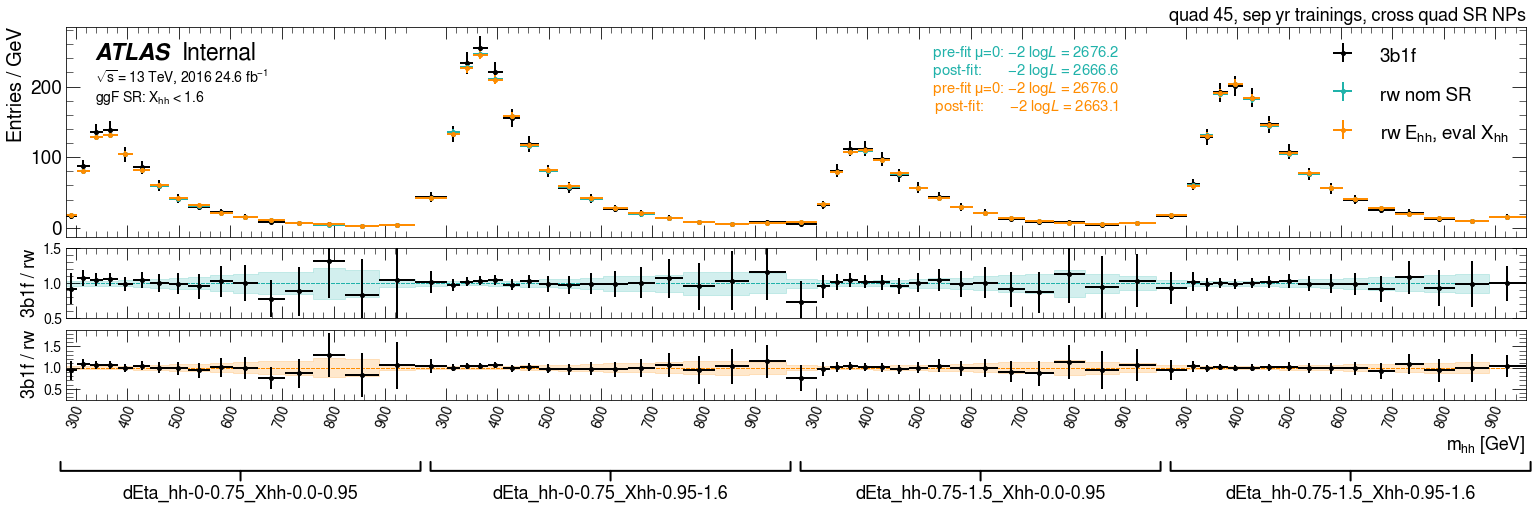

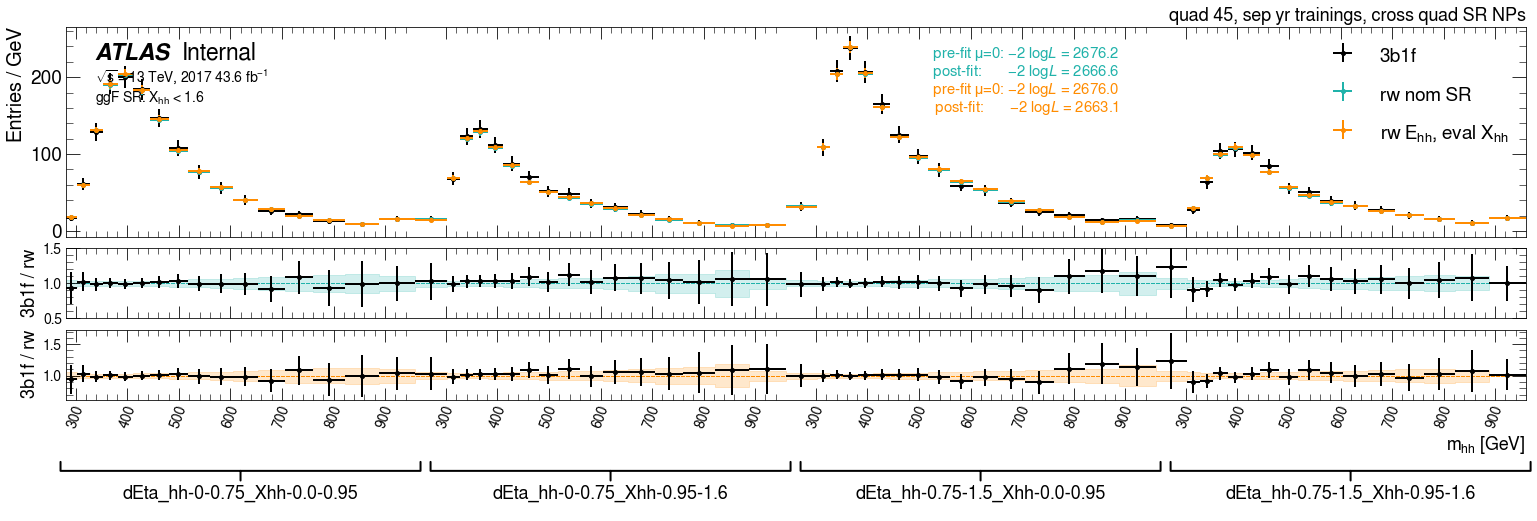

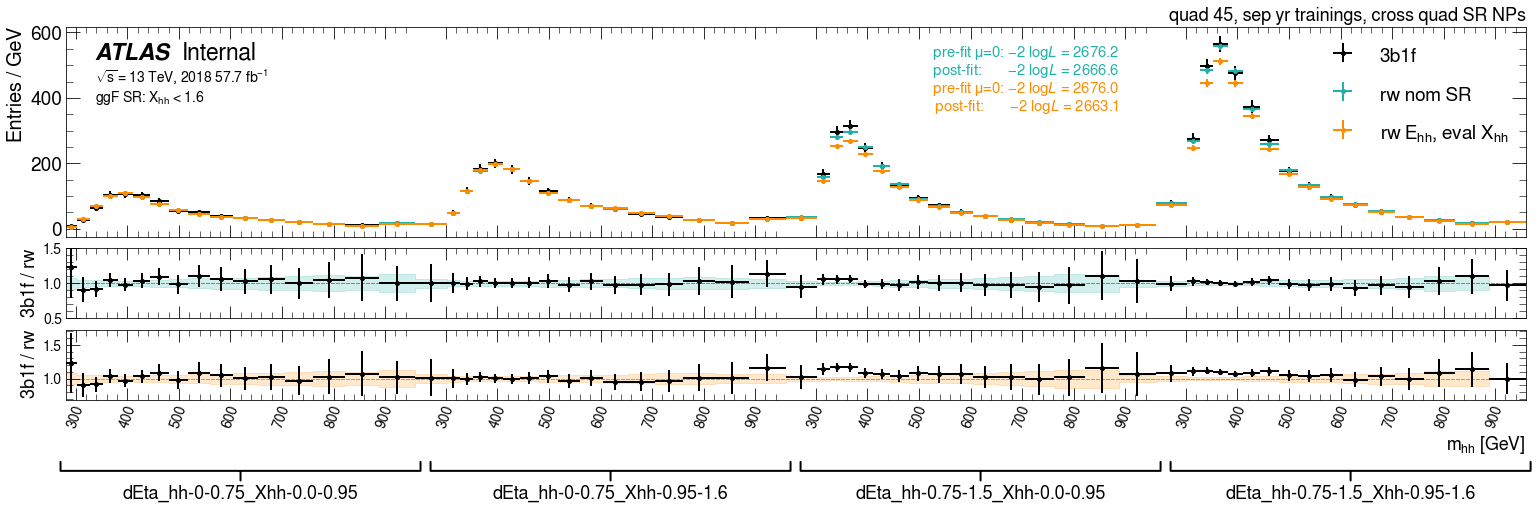

In [175]:
for yr in ['16','17','18']:
    
    fig, ax = plt.subplots(3,1,figsize=(width, 7.4), sharex=True,
                           gridspec_kw={"height_ratios": [.6, .2, .2],
                                        "hspace":0.1, "left":0.098, "bottom":bottom})


    plotter.setup_category_ticks(e,xcopies=nCats)

    shift = e[-1]-e[0]+plotter.extra_shift
    bins = np.concatenate([e]+[e[1:]+shift*i for i in range(1,nCats)])

    xx = 0.5 * (bins[1:] + bins[:-1])
    dx = 0.5 * (bins[1:] - bins[:-1])


    plotter.handle_axes(e,xcopies=nCats,ylabel='3b1f / rw', ax_here=ax[1])
    plotter.handle_axes(e,xcopies=nCats,xlabel='$m_{hh}$ [GeV]',ylabel='3b1f / rw', ax_here=ax[2])

    kwargs={'lw':0,'elinewidth':2,'marker':'.'}

    # Draw the nonminal histograms
    obs  = np.concatenate([ cat['obs']       for cat in f_xhh['hists'][yr] ])
    
    ax[0].errorbar(xx,obs,np.sqrt(obs),dx,color='k',label='3b1f',**kwargs)

    ls = []
    lc = []

    for i,f,c,l in zip([1,2],[f_xhh,f_ehh_nomSR],['lightseagreen','darkorange'],['rw nom SR','rw $E_{hh}$, eval $X_{hh}$']):

        hists = f['hists']

        post = np.concatenate([ cat['post']      for cat in hists[yr] ])
        err  = np.concatenate([ cat['post_err']  for cat in hists[yr] ])

        # Load in the likelihoods
        pre_nll = f['pre_nll']
        nll = f['nll']
        ls.append(r'pre-fit $\mu$=0: $-2 \  \log \mathcal{L}$ = '+f'{pre_nll:.1f}')
        ls.append(r'post-fit:       $-2 \  \log \mathcal{L}$ = '+f'{nll:.1f}')

        lc += [c]*2

        ax[0].errorbar(xx,post,err,dx,color=c,label=l,**kwargs)

        # Draw the compatibility w/ the nominal Xhh training
        dy = np.append(err/post,0)

        ax[i].fill_between(bins, 1-dy, 1+dy, step="pre", color=c,alpha=0.2)
        ax[i].plot(xx,np.ones_like(xx),c,ls='--',zorder=1)
        ax[i].errorbar(xx,obs/post,np.sqrt(obs)/post,dx,color='k',label='3b1f',**kwargs)

    ax[1].set_ylim(0.5,1.5)

    ax[0].legend()
    ax[0].set_title('quad 45, sep yr trainings, cross quad SR NPs',loc='right')
    ax[0].set_ylabel('Entries / GeV',y=1,ha='right')

    ax[1].set_ylabel('3b1f / rw')
    ax[0].set_xlim(bins[0],bins[-1])


    plotter.label_color='k'
    plotter.fig = fig
    plotter.ax = ax[0]
    plotter.reg_text='ggF SR: $X_{hh}$ < 1.6'
    plotter.cattext=''
    plotter.drawATLASlabel(yr,xmin=0.02,ymax=.82,line_spacing=.95)

    # Annnotate
    for cidx, cat_name in enumerate(cat_labels):
        #category = getattr(self, cat_name)
        xloc = (e[-1]+e[0])/2.+cidx*(e[-1]-e[0]+plotter.extra_shift)
        ax[2].annotate(cat_name, xy=(xloc, 0.1), xytext=(xloc, 0.07),
                       xycoords=('data','figure fraction'),
                       fontsize=18, ha='center', va='top',
                       arrowprops=dict(arrowstyle='-[, widthB=10, lengthB=0.5', lw=2.0))

    # Add likelihood text
    ymax = ax[0].get_ylim()[1]
    rainbow_text(bins[ int(2.8*len(e)) ],ymax*.85,ls,lc,yoffset=1,ax=ax[0],fontsize=15,ha='right')


In [179]:
obs_16     = np.concatenate([ cat['obs'] for cat in f_xhh['hists']['16'] ])
obs_ehh_16 = np.concatenate([ cat['obs'] for cat in f_ehh_nomSR['hists']['16'] ])

In [182]:
obs_16 == obs_ehh_16

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [183]:
obs_17     = np.concatenate([ cat['obs'] for cat in f_xhh['hists']['17'] ])
obs_ehh_17 = np.concatenate([ cat['obs'] for cat in f_ehh_nomSR['hists']['17'] ])

In [185]:
obs_17 == obs_ehh_17

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [186]:
obs_18     = np.concatenate([ cat['obs'] for cat in f_xhh['hists']['18'] ])
obs_ehh_18 = np.concatenate([ cat['obs'] for cat in f_ehh_nomSR['hists']['18'] ])

In [187]:
obs_18 == obs_ehh_18

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [190]:
obs_18[obs_18 != obs_ehh_18]

array([ 33.3, 168.7, 295.6, 314.2, 248. , 190.5, 133. ,  94.2,  71.4,
        52.9,  39.2,  28.2,  18.7,  13.4,   9.9,  10.9,  78.1, 274.9,
       497.8, 564. , 476. , 373.3, 271.3, 176.7, 131.6,  96.6,  71.9,
        51.9,  35.5,  27.2,  18.5,  19.5])

In [192]:
np.mean(obs_ehh_18[obs_18 != obs_ehh_18] / obs_18[obs_18 != obs_ehh_18])

0.9269411330698492

In [193]:
np.mean(obs_ehh_18 / obs_18)

0.9634705665349246

In [195]:
with uproot.open('../data/RR/cryptotuples/data18.root') as f:
    fmp = f['fullmassplane']

In [197]:
fmp.num_entries

51254295

In [213]:
with uproot.open('../data/RR/cryptotuples/Ehh_Q45/data18_Ehh_45.root') as f:
    ehh_raw = f['fullmassplane']
    df = ehh_raw.arrays(['X_wt_tag','pass_vbf_sel'],library='pd')

In [218]:
np.sum(~df.pass_vbf_sel & (df.X_wt_tag > 1.5))

42761929

In [215]:
with uproot.open('../data/RR/cryptotuples/Ehh_Q45/data18_Ehh_45_NN_100_bootstraps.root') as f:
    ehh = f['fullmassplane']

In [216]:
with uproot.open('../data/RR/cryptotuples/Ehh_Q45/data18_Ehh_45_NN_100_bootstraps.root') as f:
    ehh = f['fullmassplane']

In [217]:
ehh.num_entries

48378786

In [219]:
42761929 / 48378786

0.8838983475112419

## Next: *pull* plots?